# IPL Bowler Analysis

## Importing the libraries & starter function

In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pylab as pl
import json
import datetime
from IPython.display import Markdown, display

%matplotlib inline

### Function for printing in markdown

In [ ]:
def printmd(string):
    display(Markdown(string))

## Storing csv file in a variable
storing matches.csv in variable data_setm
storing deliveries.csv in variable data_set

In [184]:
data_setm = pd.read_csv('datasets/matches.csv')
data_set = pd.read_csv('datasets/deliveries.csv')

data_setm.columns = ['match_id','season','city','date','team1','team2','toss_winner','toss_decision','result','dl_applied','winner','win_by_runs','win_by_wickets','player_of_match','venue','umpire1','umpire2','umpire3']

data_set = pd.merge(data_set, data_setm, on='match_id')
data_set

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


### Columns in the merged dataset

In [191]:
print(data_set.columns.values)

['match_id' 'inning' 'batting_team' 'bowling_team' 'over' 'ball' 'batsman'
 'non_striker' 'bowler' 'is_super_over' 'wide_runs' 'bye_runs'
 'legbye_runs' 'noball_runs' 'penalty_runs' 'batsman_runs' 'extra_runs'
 'total_runs' 'player_dismissed' 'dismissal_kind' 'fielder' 'season'
 'city' 'date' 'team1' 'team2' 'toss_winner' 'toss_decision' 'result'
 'dl_applied' 'winner' 'win_by_runs' 'win_by_wickets' 'player_of_match'
 'venue' 'umpire1' 'umpire2' 'umpire3']


## Calculating the performance of the bowlers

**The bowler performance has been stored as follows:**
{ NAME: [ Total balls, Total runs, Total wickets, Wide balls, No balls] }

In [125]:
bowler_performance = {}

for index in range(0, len(data_set['bowler'])):
    try:
        total_balls = bowler_performance[data_set['bowler'][index]][0] + 1
        total_runs = bowler_performance[data_set['bowler'][index]][1] + data_set['total_runs'][index]
        total_wickets = bowler_performance[data_set['bowler'][index]][2]
        
        wide_balls = bowler_performance[data_set['bowler'][index]][3]
        no_balls = bowler_performance[data_set['bowler'][index]][4]
        
        if(data_set['wide_runs'][index] != 0):
            wide_balls = wide_balls + 1
        if(data_set['noball_runs'][index] != 0):
            no_balls = no_balls + 1
        
        try:
            if(math.isnan(data_set['dismissal_kind'][index])):
                bowler_performance[data_set['bowler'][index]] = [total_balls, total_runs, total_wickets, wide_balls, no_balls]
        except:
            total_wickets = bowler_performance[data_set['bowler'][index]][2] + 1
            bowler_performance[data_set['bowler'][index]] = [total_balls, total_runs, total_wickets, wide_balls, no_balls]
            
    except:
        try:
            if(math.isnan(data_set['dismissal_kind'][index])):
                bowler_performance[data_set['bowler'][index]] = [0, data_set['total_runs'][index], 1, 0, 0 ]
        except:
            bowler_performance[data_set['bowler'][index]] = [0, data_set['total_runs'][index], 0, 0, 0 ]

In [126]:
bowler_performance

{'A Ashish Reddy': [269, 400, 20, 6, 2],
 'A Chandila': [233, 245, 12, 0, 0],
 'A Choudhary': [107, 144, 6, 6, 1],
 'A Flintoff': [65, 106, 3, 0, 0],
 'A Kumble': [982, 1089, 50, 13, 5],
 'A Mishra': [2702, 3305, 143, 44, 20],
 'A Mithun': [311, 477, 9, 14, 9],
 'A Nehra': [1973, 2537, 122, 57, 9],
 'A Nel': [17, 31, 2, 0, 0],
 'A Singh': [485, 639, 30, 12, 1],
 'A Symonds': [539, 694, 24, 12, 1],
 'A Uniyal': [37, 67, 4, 1, 0],
 'A Zampa': [224, 281, 20, 4, 0],
 'AA Chavan': [254, 339, 9, 7, 0],
 'AA Jhunjhunwala': [87, 130, 2, 3, 0],
 'AA Kazi': [12, 21, 2, 1, 0],
 'AA Noffke': [24, 41, 2, 0, 0],
 'AB Agarkar': [819, 1174, 34, 36, 2],
 'AB Dinda': [1588, 2103, 83, 58, 14],
 'AB McDonald': [187, 263, 15, 2, 0],
 'AC Gilchrist': [0, 0, 0, 0, 0],
 'AC Thomas': [326, 416, 17, 10, 2],
 'AC Voges': [55, 76, 2, 2, 0],
 'AD Mascarenhas': [309, 365, 20, 2, 0],
 'AD Mathews': [806, 1095, 29, 15, 1],
 'AD Russell': [650, 917, 37, 17, 3],
 'AF Milne': [114, 185, 6, 7, 0],
 'AG Murtaza': [268, 32

### Storing the performances in individual arrays

In [146]:
count = 1

index_positions = []
total_balls = []
total_runs = []
bowler_names = []
total_dismissals = []
total_wideballs = []
total_noballs = []

total_bowling_average = []
total_strike_rates = []
total_economy_rates = []

for player in bowler_performance:
    bowler_names.append(player)
    
    total_balls.append(bowler_performance[player][0])
    total_runs.append(bowler_performance[player][1])
    total_dismissals.append(bowler_performance[player][2])
    total_wideballs.append(bowler_performance[player][3])
    total_noballs.append(bowler_performance[player][4])
    
    try:
        total_bowling_average.append(float(bowler_performance[player][1])/float(bowler_performance[player][2]))
    except:
        total_bowling_average.append(-1)
    try:
        total_strike_rates.append(float(bowler_performance[player][0])/float(bowler_performance[player][2]))
    except:
        total_strike_rates.append(-1)
    try:
        total_economy_rates.append(float(bowler_performance[player][1])/float(bowler_performance[player][0]/7))
    except:
        total_economy_rates.append(-1)

    index_positions.append(count)
    count = count + 1

## Analysis & plotting of the calculated statistics

### Analysing the co-relation between the stats

In [147]:
bowler_dict = {"Balls":total_balls, "Runs":total_runs, "Dismissals":total_dismissals, "Wide balls":total_wideballs, "No balls":total_noballs, "Strike rate": total_strike_rates, "Bowling average": total_bowling_average, "Economy rate": total_economy_rates}
bowler_dataframe = pd.DataFrame(bowler_dict)
bowler_dataframe.corr()

,Balls,Bowling average,Dismissals,Economy rate,No balls,Runs,Strike rate,Wide balls
Balls,1.000000,-0.024085,0.981282,-0.252837,0.603706,0.995869,0.126275,0.897703
Bowling average,-0.024085,1.000000,-0.093420,0.102406,0.012917,-0.010119,0.907664,-0.017725
Dismissals,0.981282,-0.093420,1.000000,-0.246801,0.607443,0.978270,0.045962,0.887134
Economy rate,-0.252837,0.102406,-0.246801,1.000000,-0.140225,-0.240848,-0.224040,-0.220120
No balls,0.603706,0.012917,0.607443,-0.140225,1.000000,0.619493,0.085270,0.656284
Runs,0.995869,-0.010119,0.978270,-0.240848,0.619493,1.000000,0.130351,0.900756
Strike rate,0.126275,0.907664,0.045962,-0.224040,0.085270,0.130351,1.000000,0.107562
Wide balls,0.897703,-0.017725,0.887134,-0.220120,0.656284,0.900756,0.107562,1.000000


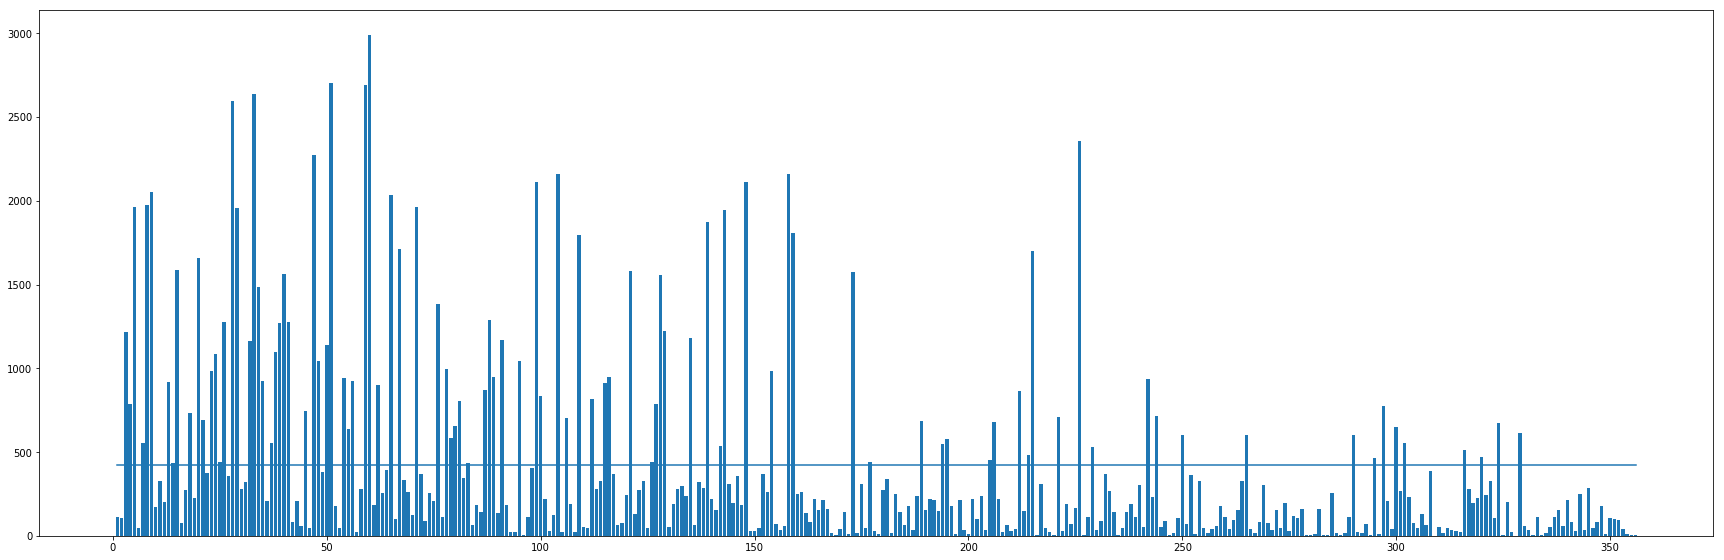

In [171]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_balls)

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_balls))
plt.plot(index_positions, mean)

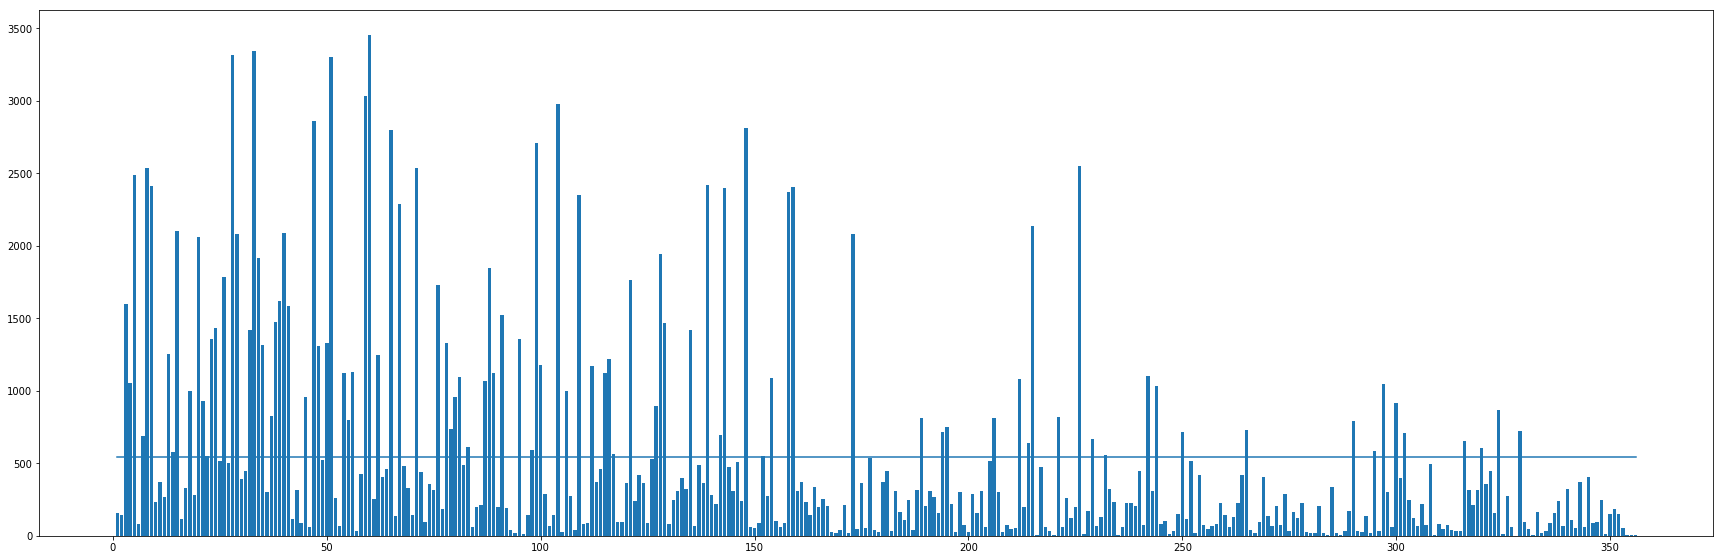

In [172]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_runs)

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_runs))
plt.plot(index_positions, mean)

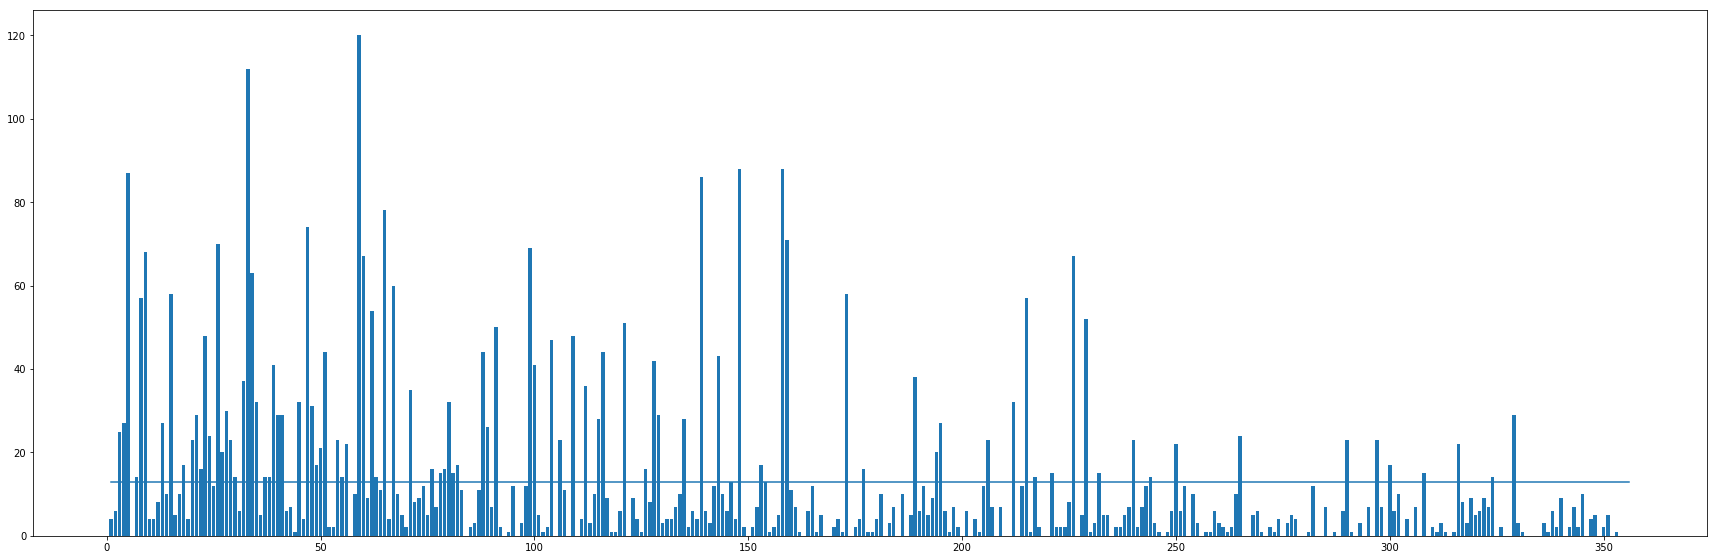

In [173]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_wideballs)

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_wideballs))
plt.plot(index_positions, mean)

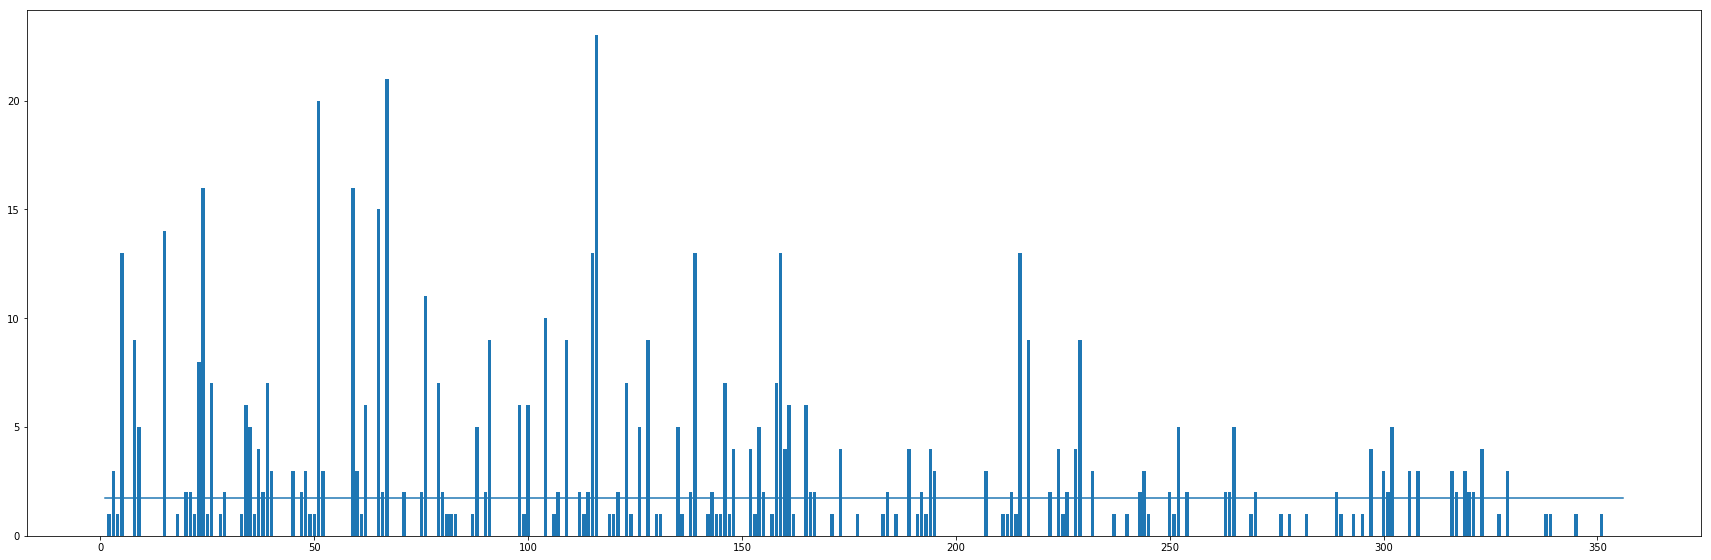

In [174]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_noballs)

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_noballs))
plt.plot(index_positions, mean)

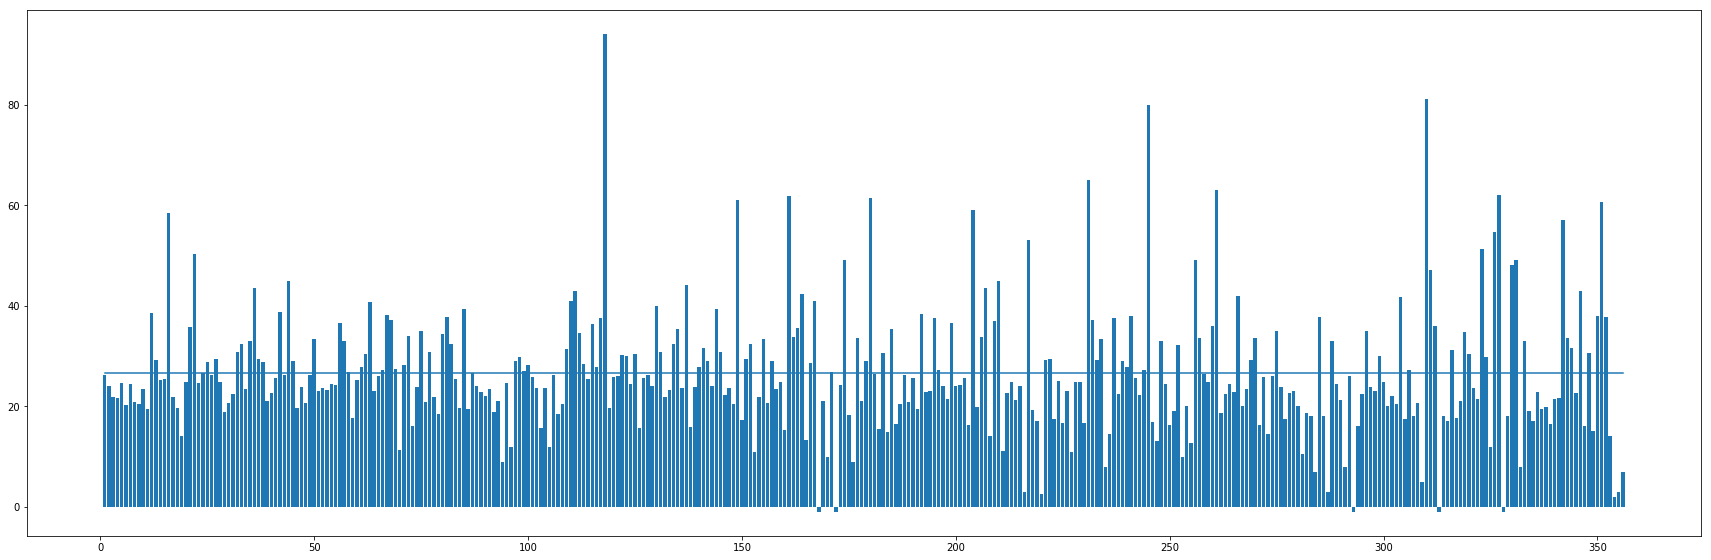

In [175]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_bowling_average)

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_bowling_average))
plt.plot(index_positions, mean)

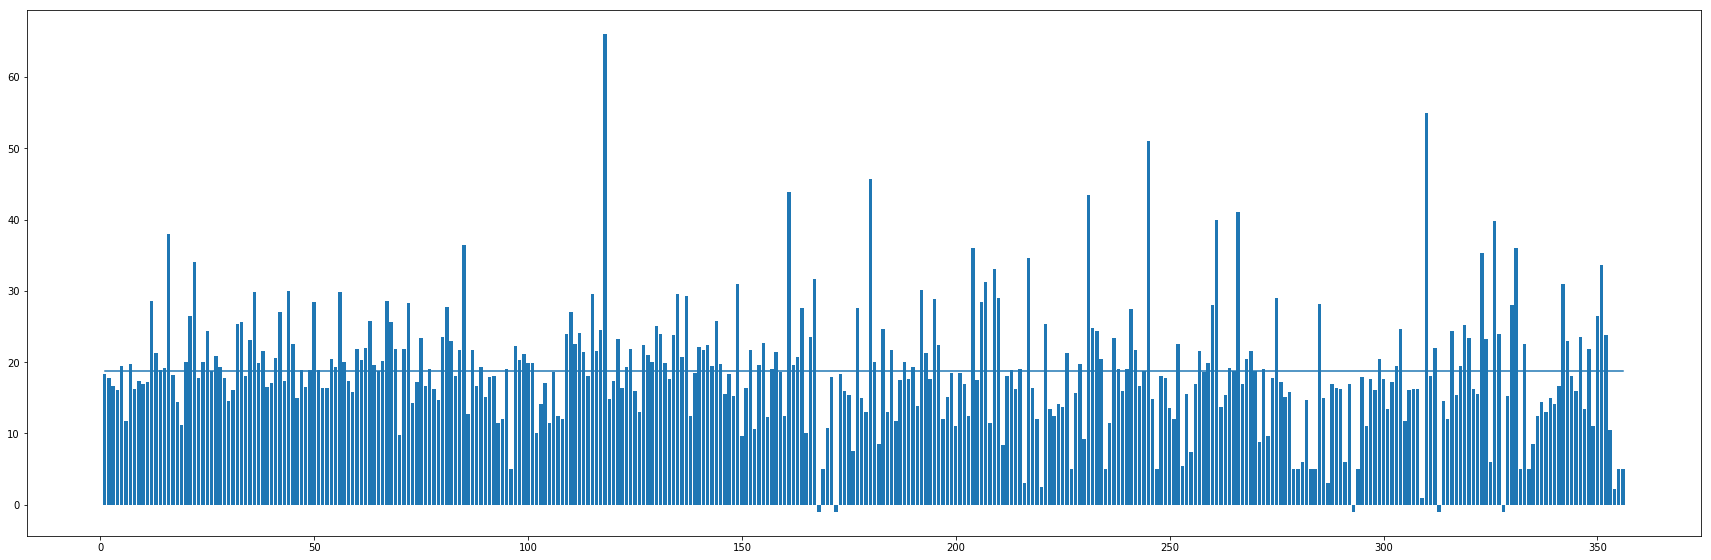

In [176]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_strike_rates)

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_strike_rates))
plt.plot(index_positions, mean)

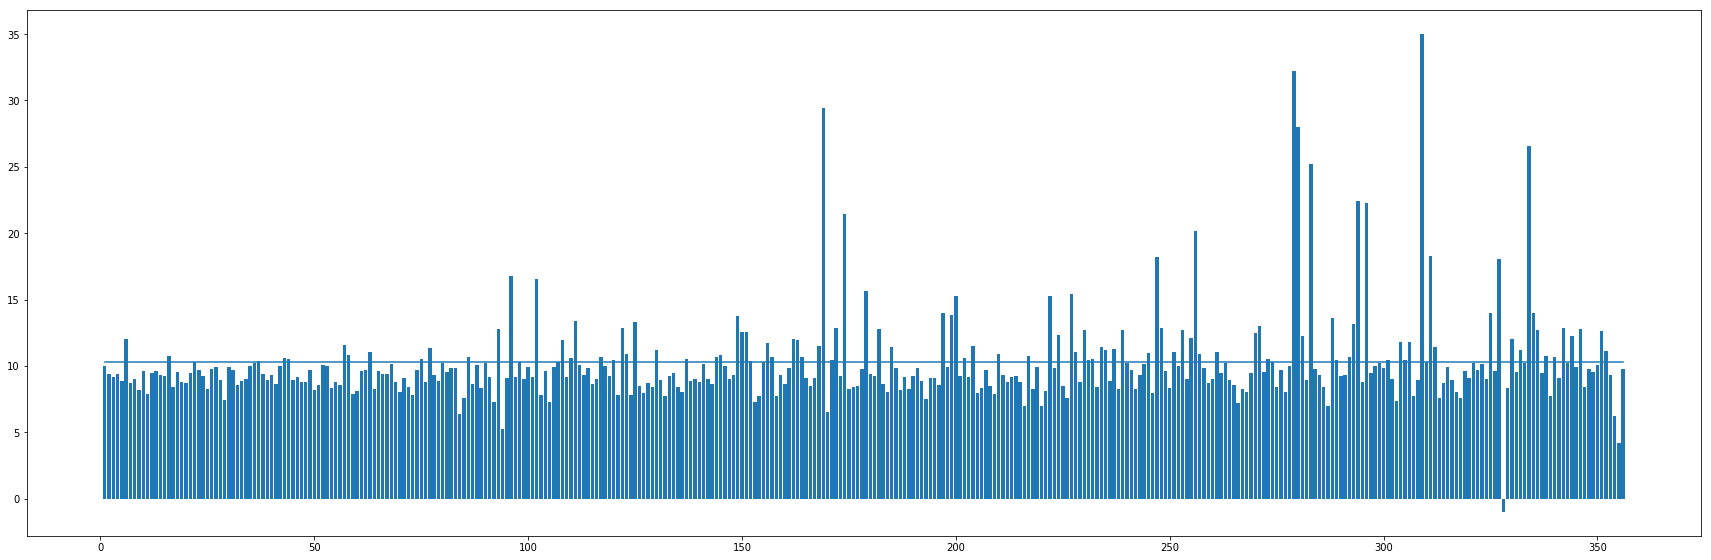

In [177]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom=0.15)
ax = plt.bar(index_positions, total_economy_rates)

mean = np.empty(len(index_positions))
mean.fill(np.mean(total_economy_rates))
plt.plot(index_positions, mean)

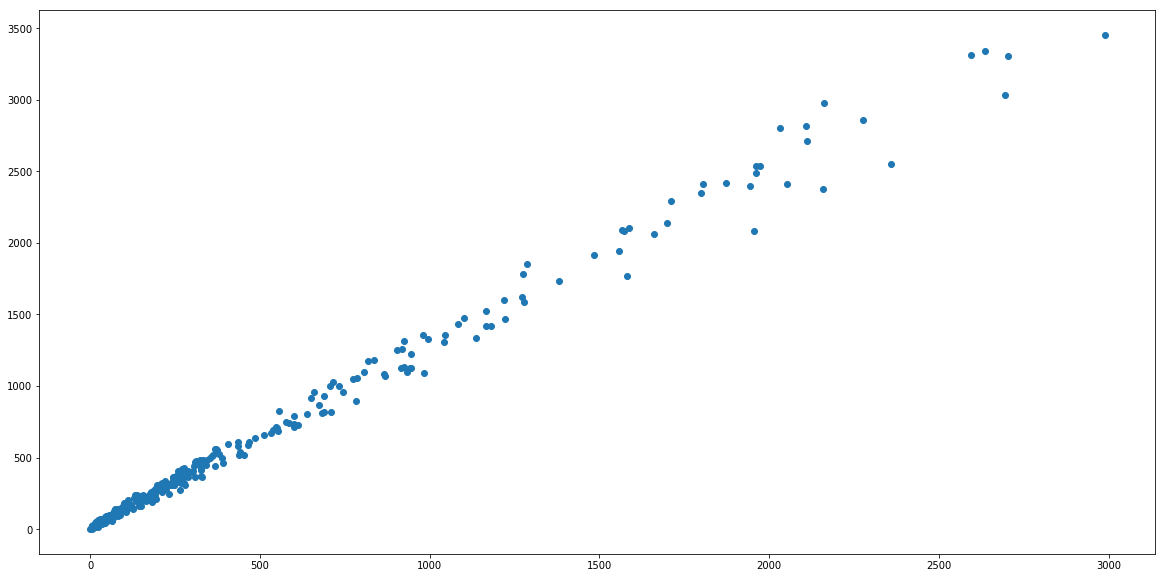

In [151]:
plt.figure(figsize=(20,10))
plt.scatter(total_balls, total_runs)

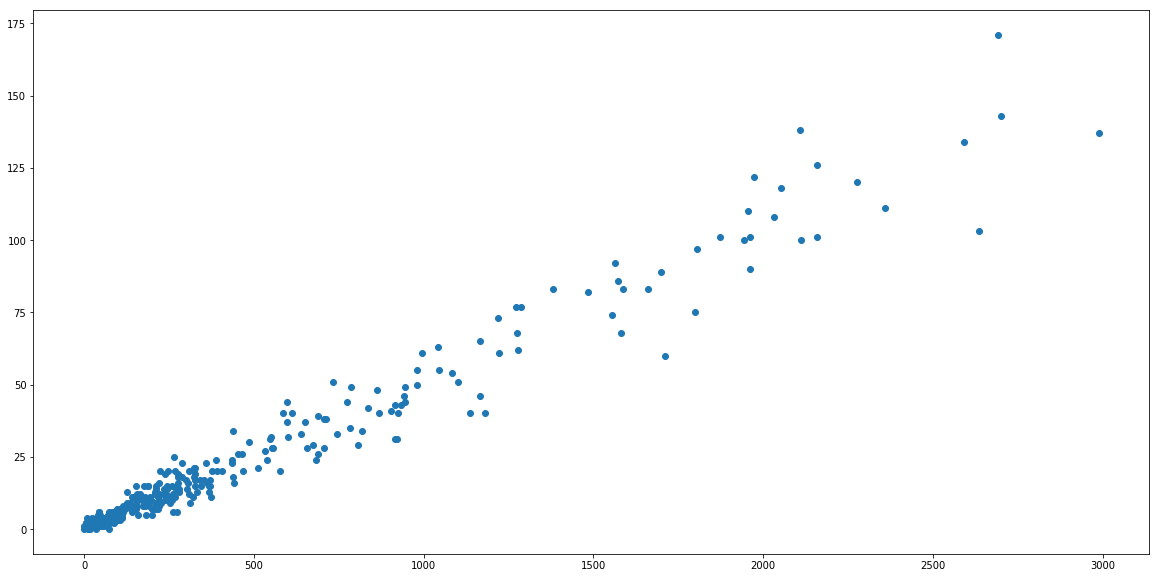

In [152]:
plt.figure(figsize=(20,10))
plt.scatter(total_balls, total_dismissals)

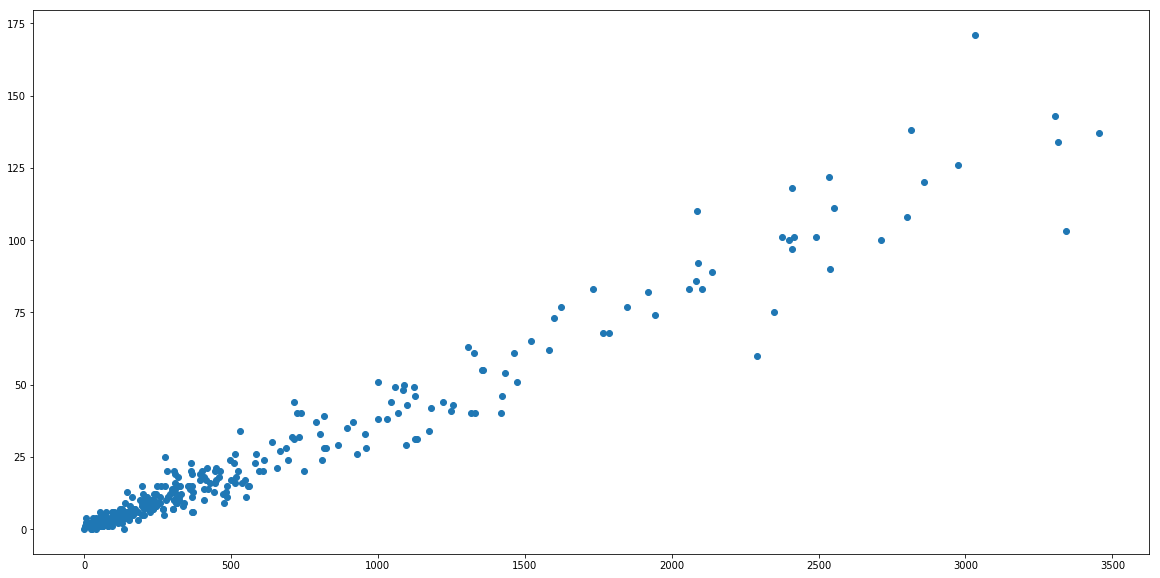

In [136]:
plt.figure(figsize=(20,10))
plt.scatter(total_runs, total_dismissals)

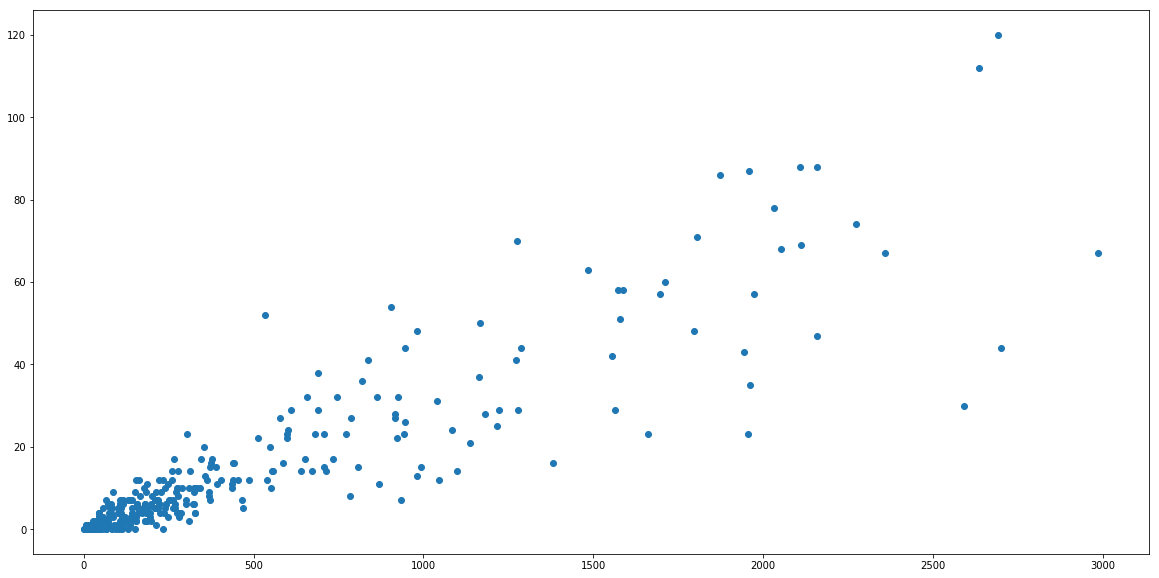

In [183]:
plt.figure(figsize=(20,10))
plt.scatter(total_balls, total_wideballs)

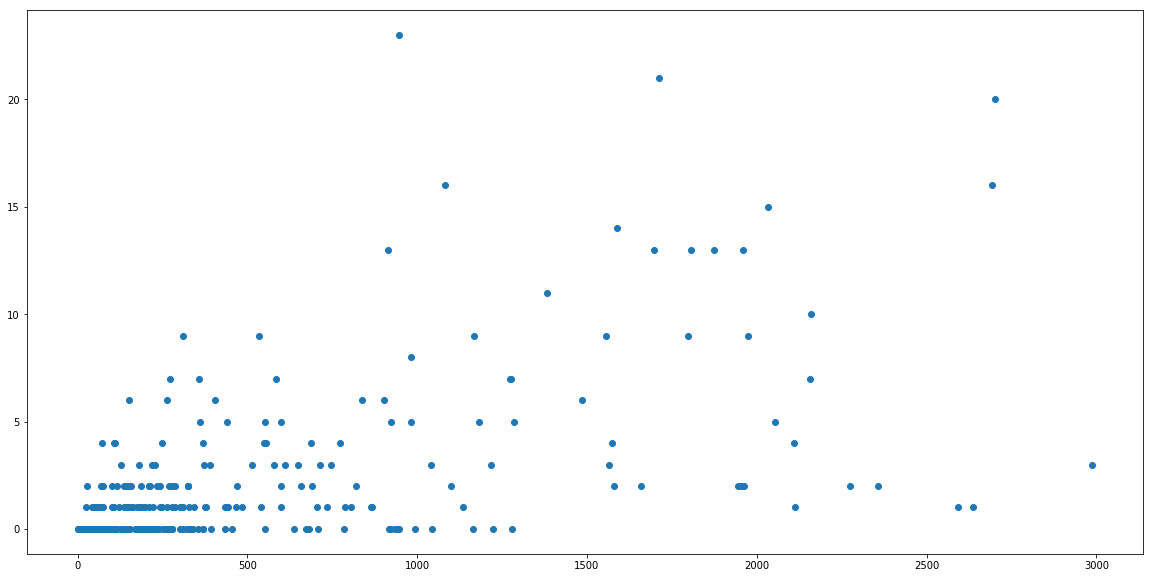

In [138]:
plt.figure(figsize=(20,10))
plt.scatter(total_balls, total_noballs)

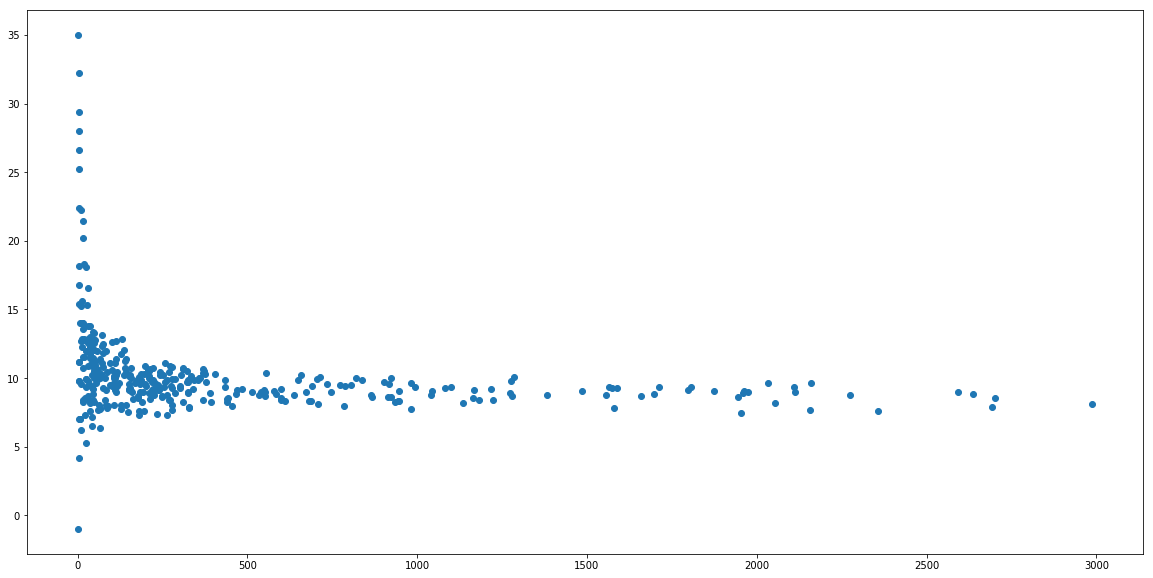

In [182]:
plt.figure(figsize=(20,10))
plt.scatter(total_balls, total_economy_rates)

## Top players in every category 

### Most balls delivered

In [113]:
top_overs = sorted(range(len(total_balls)), key=lambda i: total_balls[i])[-5:]

for value in top_overs[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_balls[value]))

**Harbhajan Singh** : 2988

**A Mishra** : 2702

**SL Malinga** : 2693

**P Kumar** : 2636

**PP Chawla** : 2593

### Most runs given

In [116]:
top_runs = sorted(range(len(total_runs)), key=lambda i: total_runs[i])[-5:]

for value in top_runs[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_runs[value]))

**Harbhajan Singh** : 3453

**P Kumar** : 3342

**PP Chawla** : 3315

**A Mishra** : 3305

**SL Malinga** : 3034

### Most dismissals taken

In [117]:
top_dismissals = sorted(range(len(total_runs)), key=lambda i: total_dismissals[i])[-5:]

for value in top_dismissals[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_dismissals[value]))

**SL Malinga** : 170

**A Mishra** : 142

**DJ Bravo** : 137

**Harbhajan Singh** : 136

**PP Chawla** : 133

### Highest bowling average

In [178]:
top_bowling_average = sorted(range(len(total_runs)), key=lambda i: total_bowling_average[i])[-5:]

for value in top_bowling_average[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_bowling_average[value]))

**K Goel** : 94.0

**K Upadhyay** : 81.0

**KAJ Roach** : 80.0

**AA Jhunjhunwala** : 65.0

**AUK Pathan** : 63.0

### Highest strike rates

In [179]:
top_strike_rates = sorted(range(len(total_runs)), key=lambda i: total_strike_rates[i])[-5:]

for value in top_strike_rates[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_strike_rates[value]))

**K Goel** : 66.0

**K Upadhyay** : 55.0

**KAJ Roach** : 51.0

**TM Dilshan** : 45.666666666666664

**V Kohli** : 43.833333333333336

### Highest economy rates

In [180]:
top_economy_rates = sorted(range(len(total_runs)), key=lambda i: total_economy_rates[i])[-5:]

for value in top_economy_rates[::-1]:
    printmd('**' + bowler_names[value] + '** : ' + str(total_economy_rates[value]))

**SPD Smith** : 35.0

**I Malhotra** : 32.199999999999996

**LPC Silva** : 29.4

**B Chipli** : 28.0

**V Shankar** : 26.599999999999998